# 2.4 Обучение, переобучение, недообучение и кросвалидация

In [215]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 30% !important; height: 30% !important;} </style>" 

In [ ]:
pd.set_option('display.max_columns', None)

# Титаник

In [217]:
titanic_data = pd.read_csv('data/titanic/train.csv')

In [218]:
titanic_data.head()

,PassengerId,Survived,...,Cabin,Embarked
0,1,0,...,NaN,S
1,2,1,...,C85,C
2,3,1,...,NaN,S
3,4,1,...,C123,S
4,5,0,...,NaN,S


In [219]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [220]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [221]:
drop_cols = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']
X = titanic_data.drop(drop_cols, axis=1)
y = titanic_data['Survived']

In [222]:
X.head()

,Pclass,Sex,...,Fare,Embarked
0,3,male,...,7.2500,S
1,1,female,...,71.2833,C
2,3,female,...,7.9250,S
3,1,female,...,53.1000,S
4,3,male,...,8.0500,S


In [223]:
X = pd.get_dummies(X)

In [224]:
X.head()

,Pclass,Age,...,Embarked_Q,Embarked_S
0,3,22.0,...,False,True
1,1,38.0,...,False,False
2,3,26.0,...,False,True
3,1,35.0,...,False,True
4,3,35.0,...,False,True


In [225]:
X.isna().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [226]:
X = X.fillna({'Age': X['Age'].median()})
X.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [227]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')

In [228]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [229]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
                                    class_names=['Died', 'Survived'], filled=True))
# display(SVG(graph.pipe(format='svg')))

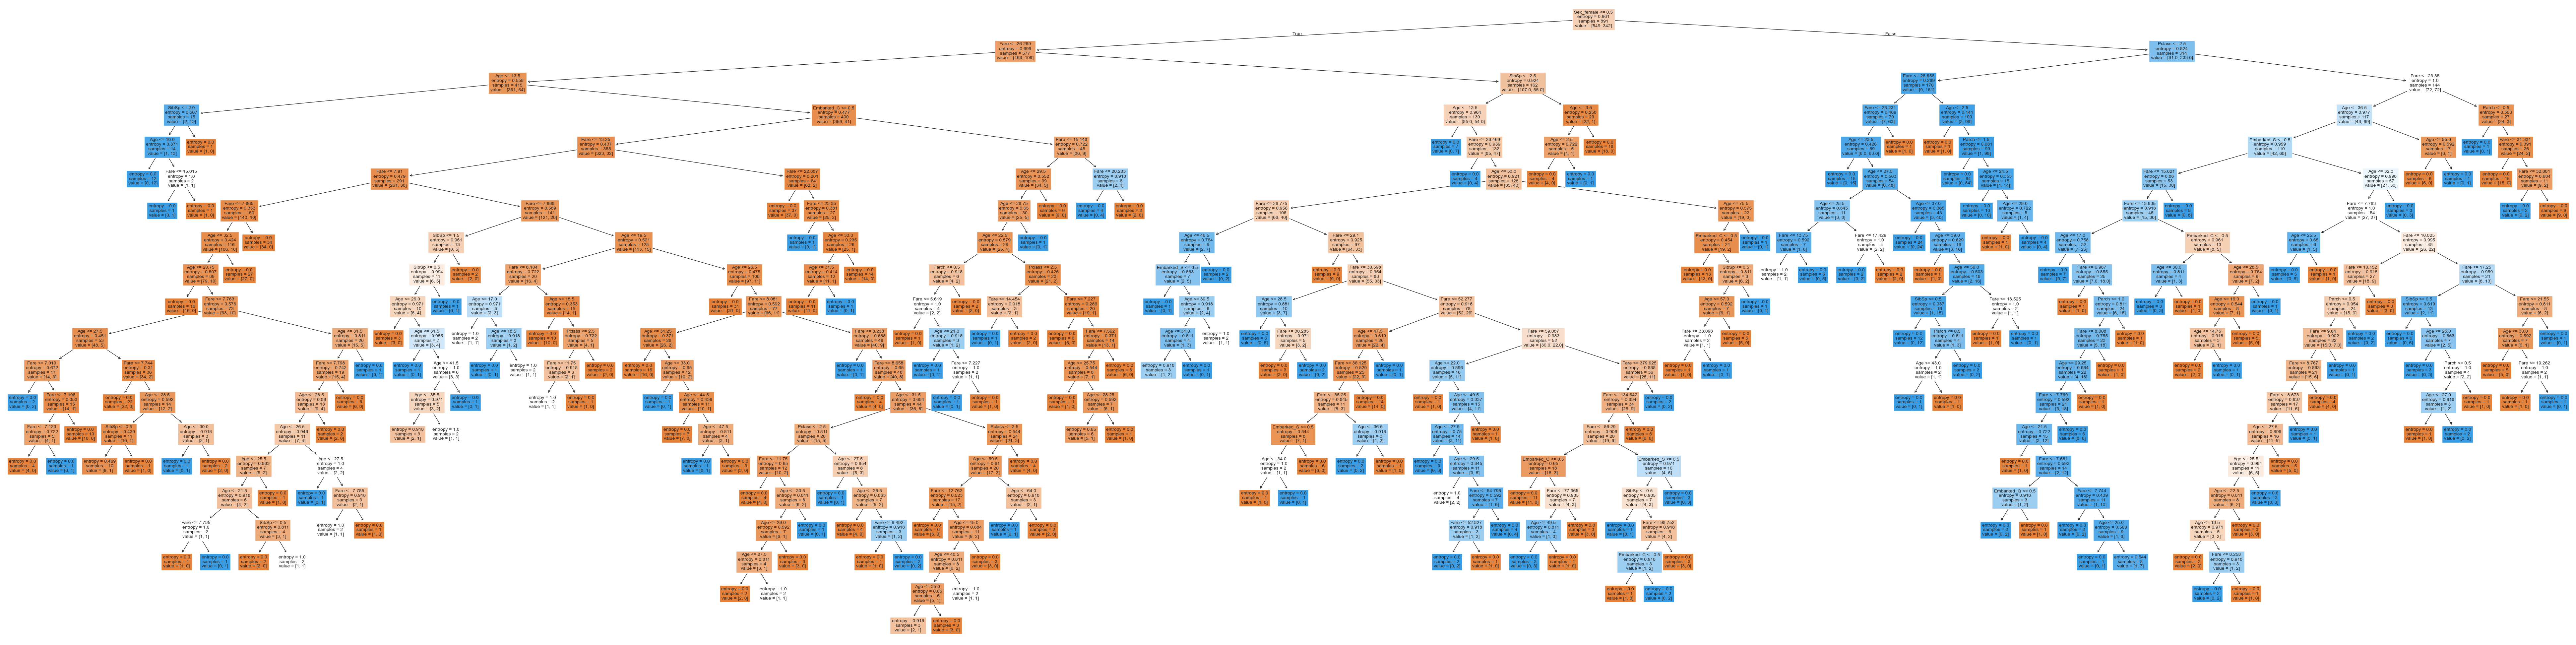

In [230]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True);

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [232]:
len(X_test) / len(X)

0.33108866442199775

In [233]:
# Точность классификации
clf.score(X, y)

0.9797979797979798

In [234]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [235]:
clf.score(X_test, y_test)

0.7796610169491526

In [236]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [237]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8406040268456376
0.8067796610169492


In [238]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [239]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8238255033557047
0.8203389830508474


In [240]:
max_depth_values = range(1, 100)

In [241]:
scores_data = pd.DataFrame()

In [242]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [243]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


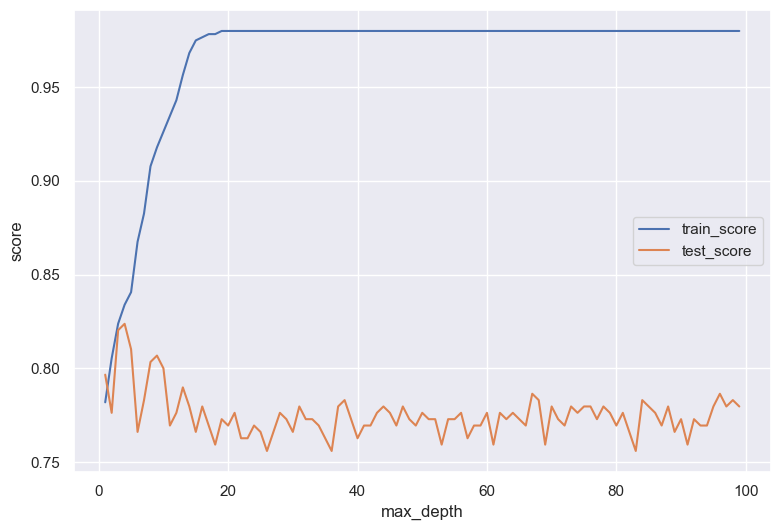

In [244]:
plt.plot(scores_data['max_depth'], scores_data['train_score'])
plt.plot(scores_data['max_depth'], scores_data['test_score'])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(['train_score', 'test_score'])

plt.show();

In [245]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                      value_vars=['train_score', 'test_score'],
                      var_name='set_type',
                      value_name='score')

In [246]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


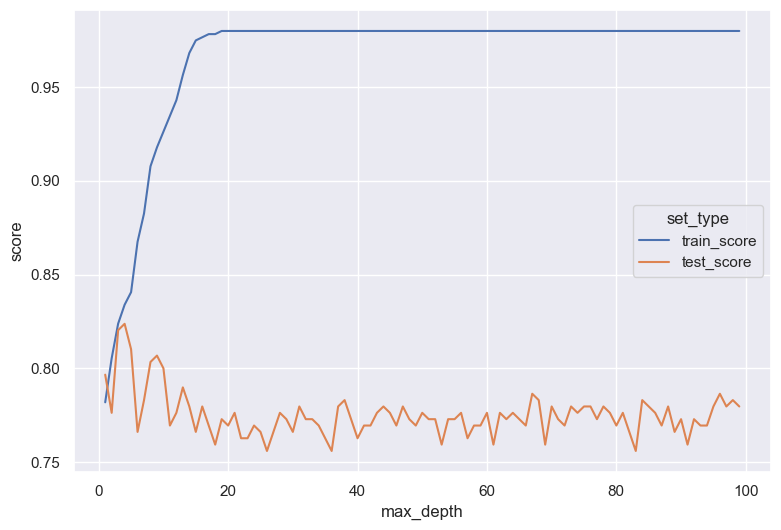

In [247]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show();

In [248]:
from sklearn.model_selection import cross_val_score

In [249]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [250]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
cv_scores.mean()

0.7886274509803922

In [251]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [252]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    cv_score_mean = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cv_score': [cv_score_mean]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [253]:
scores_data.head()

,max_depth,train_score,test_score,cv_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392


In [254]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                      value_vars=['train_score', 'test_score', 'cv_score'],
                      var_name='set_type',
                      value_name='score')

In [255]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


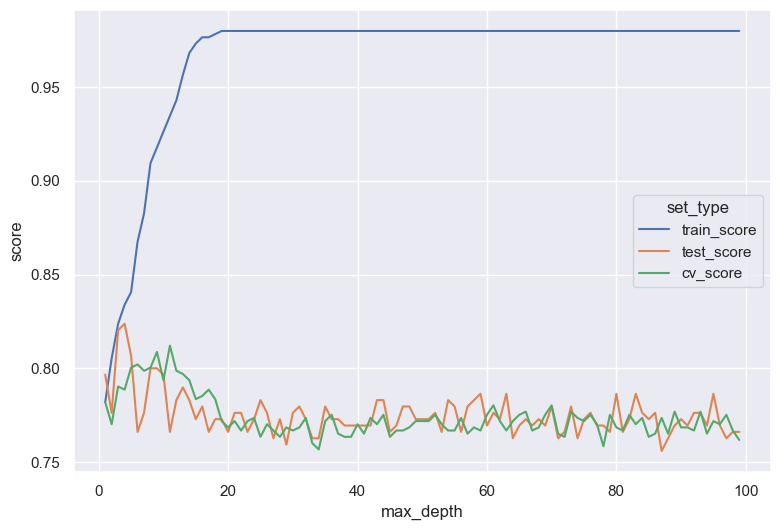

In [256]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show();

In [257]:
scores_data_long.query("set_type == 'cv_score'").head(20)

,max_depth,set_type,score
198,1,cv_score,0.781961
199,2,cv_score,0.770196
200,3,cv_score,0.790322
201,4,cv_score,0.788627
202,5,cv_score,0.800392
203,6,cv_score,0.802073
204,7,cv_score,0.798697
205,8,cv_score,0.800364
206,9,cv_score,0.808754
207,10,cv_score,0.793627


In [258]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [259]:
cv_scores = cross_val_score(best_clf, X_train, y_train, cv=5)
cv_scores.mean()

0.8020308123249299

In [260]:
cv_scores = cross_val_score(best_clf, X_test, y_test, cv=5)
cv_scores.mean()

0.7898305084745763

# Ирисы

In [261]:
np.random.seed(0)

In [262]:
train_iris = pd.read_csv('data/train_iris.csv')
test_iris = pd.read_csv('data/test_iris.csv')

In [263]:
train_iris.head()

,Unnamed: 0,sepal length,...,petal width,species
0,130,7.4,...,1.9,2
1,7,5.0,...,0.2,0
2,11,4.8,...,0.2,0
3,142,5.8,...,1.9,2
4,109,7.2,...,2.5,2


In [264]:
X_train = train_iris.drop(['Unnamed: 0', 'species'], axis=1)
y_train = train_iris['species']

X_test = test_iris.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_iris['species']

In [265]:
scores_data = pd.DataFrame()

In [266]:
from sklearn.metrics import accuracy_score

max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


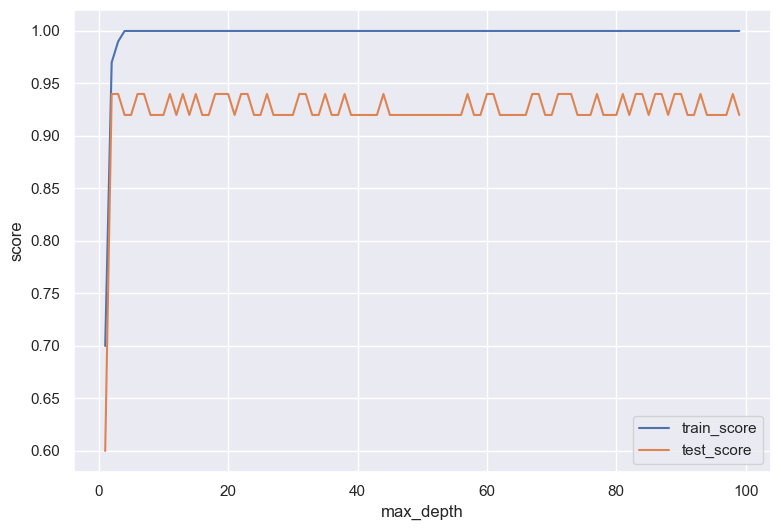

In [267]:
plt.plot(scores_data['max_depth'], scores_data['train_score'])
plt.plot(scores_data['max_depth'], scores_data['test_score'])

plt.xlabel('max_depth')
plt.ylabel('score')

plt.legend(['train_score', 'test_score'])

plt.show();

In [268]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                      value_vars=['train_score', 'test_score'],
                      var_name='set_type',
                      value_name='score')

scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


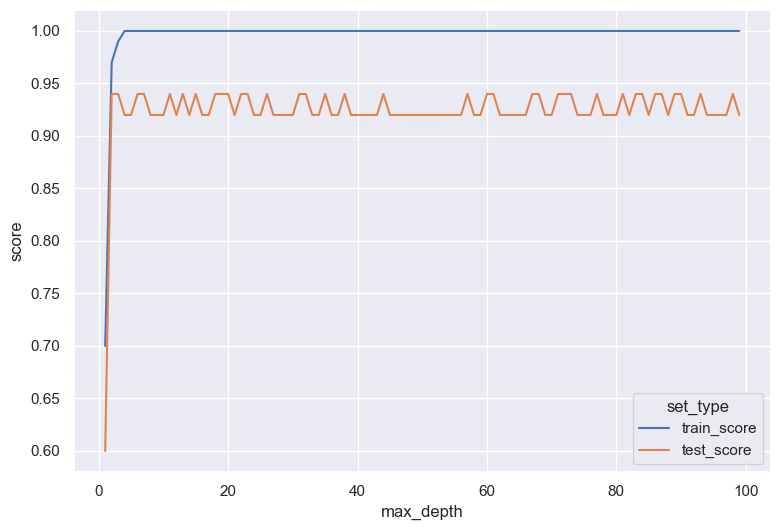

In [269]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')
plt.show();

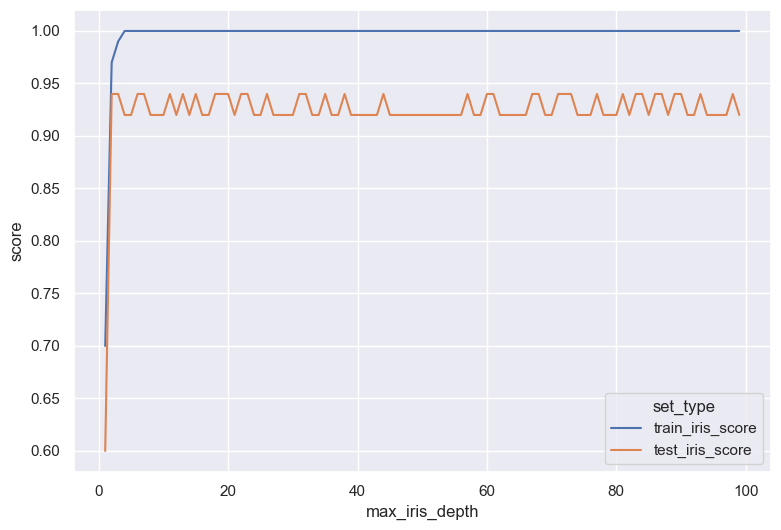

In [270]:
# Импортируем специализированные модули Pandas и Numpy, не являющиеся частью стандартной библиотеки Python.
import pandas as pd
import numpy as np

# а также импортируем модули Seaborn, Matplotlib для работы с графикой.
import matplotlib.pyplot as plt
import seaborn as sns


# Импортируем модуль tree из библиотеки sklearn для реализации алгоритмов решающих деревьев.
from sklearn import tree

# Импортируем модули, необходимые для визуализации дерева решений.
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)


# Устанавливаем размер области для построения графиков.
sns.set_theme(rc={'figure.figsize': (9, 6)})

# Считываем тренировочный файл.
train_iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
# Считываем тестовый файл.
test_iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

# Отбросим колонки, не несущие важной информации для построения дерева решений.
# Отбрасываем не только предсказываемую species, но и первую колонку, так как она содержит id каждого экземпляра (цветка), а он для построения графика не нужен.
X_train_iris = train_iris_data.drop(['Unnamed: 0', 'species'], axis=1)
X_test_iris = test_iris_data.drop(['Unnamed: 0', 'species'], axis=1)

# Создадим переменные, которые будем предсказывать.
y_train_iris = train_iris_data.species
y_test_iris = test_iris_data.species

# Подберем оптимальное значение глубины обучения дерева.
# Зададим диапазон исследуемых значений.
max_iris_depth_values = range(1, 100)

# Обнулим DataFrame.
scores_iris_data = pd.DataFrame()

#  Задаем random seed.
rs = np.random.seed(0)

for max_iris_depth in max_iris_depth_values:
    # Изменяем глубину обучения дерева по циклу от 1 до 99 с шагом 1.
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_iris_depth, random_state=rs)
    # Обучаем дерево решений (с ограниченной глубиной) на подмножестве train.
    clf_iris.fit(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество train)
    train_iris_score = clf_iris.score(X_train_iris, y_train_iris)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество test)
    test_iris_score = clf_iris.score(X_test_iris, y_test_iris)
    # Создаем временный DataFrame.
    temp_score_iris_data = pd.DataFrame({'max_iris_depth':[max_iris_depth],
                                         'train_iris_score':[train_iris_score],
                                         'test_iris_score':[test_iris_score]})
    # Наращиваем DataFrame "scores_iris_data".
    scores_iris_data = pd.concat([scores_iris_data, temp_score_iris_data])

# Видоизменим DataFrame, применив метод melt().
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_iris_depth'],
                           value_vars=['train_iris_score','test_iris_score'],
                           var_name='set_type', value_name='score')

# Визуализация.
sns.lineplot(x='max_iris_depth', y='score', hue='set_type', data=scores_iris_data_long)

# Отображение графиков Matplotlib и Seaborn.
plt.show();

# Котики и собачки

In [271]:
df_train = pd.read_csv(r'data\dogs_n_cats.csv')

df_train.head()

,Длина,Высота,...,Лазает по деревьям,Вид
0,15,18.0,...,0,собачка
1,20,24.0,...,0,собачка
2,34,40.8,...,0,собачка
3,26,31.2,...,0,собачка
4,16,19.2,...,0,собачка


In [272]:
# Приводим собак к единице, котов к нулям. Строим дерево.

df_train['Вид'] = df_train['Вид'].replace(['собачка','котик'], [1,0])
X_train = df_train.drop('Вид', axis=1)
y_train = df_train['Вид']

X_train.head()

C:\Users\Pong\AppData\Local\Temp\ipykernel_8768\861911230.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Вид'] = df_train['Вид'].replace(['собачка','котик'], [1,0])


,Длина,Высота,...,Гавкает,Лазает по деревьям
0,15,18.0,...,1,0
1,20,24.0,...,0,0
2,34,40.8,...,1,0
3,26,31.2,...,1,0
4,16,19.2,...,1,0


In [273]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

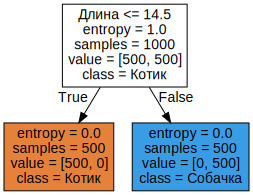

In [274]:
# Выводим дерево графически.

graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X_train), class_names=['Котик', 'Собачка']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [275]:
df_test = pd.read_json(r'data/dataset_209691_15.txt')

df_test.head()

,Длина,Высота,...,Гавкает,Лазает по деревьям
0,22,26.4,...,1,0
1,33,39.6,...,1,0
2,24,28.8,...,1,0
3,29,34.8,...,1,0
4,24,28.8,...,1,0


In [276]:
sum(df_test['Длина'] > 14.5)

53

In [277]:
# Даем дереву данные, которые для попыток индивидуальны. Предсказание начинается.

X_test = df_test
y_pred = clf.predict(X_test)

In [278]:
# Далее считаем котов и собак, которых предсказали.
print(y_pred.tolist().count(1))
print(y_pred.sum())

53
53


# 2.5 Метрики качества модели

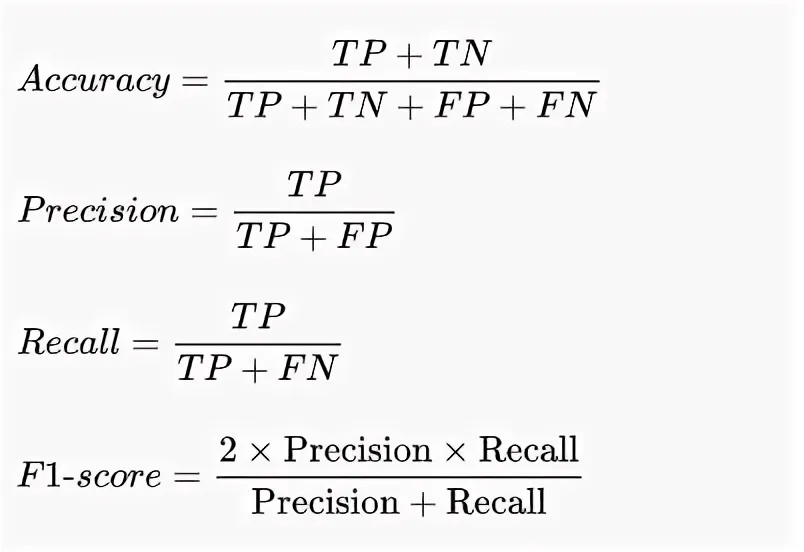

In [286]:
# Precision (точность) - отношение TP к TP + FP. 
# Это доля объектов, названными классификатором положительными и при этом действительно являющимися положительными.
# Отражает верно классифицированные положительные объекты с учетом ложных срабатываний.

# Recall (Полнота) - отношение TP к TP + FN. 
# Это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм.
# Отражает верно классифицированные положительные объекты с учетом всех положительных объектов.

In [287]:
# Пастух сказал что волки есть в 30 случаях из 100

# TP
# На самом деле волки были в 15 случаях из этих 30. Это как раз и есть "верное срабатывание" или True Positive.

# FP
# Соответственно ситуация, когда пастух сказал что волки есть, а их не было называется False Positive (в данном случае это тоже 15). 
# Иными словами "ложное срабатывание".

# FN
# Из 70 оставшихся случаев - 30 раз волки были, но пастух сказал что волков нет - это False Negative, 
# то есть "пропуск события"

# Далее осталось 40 случаев, когда пастух сказал что волков нет и их действительно не было. Это True Negative, 
# получается что-то типа "верное бездействие"

In [288]:
# Некий Анатолий зарегистрировался в приложении знакомств, 
# некий алгоритм на основе машинного обучения порекомендовал Анатолию 30 фотографий из 100. 
# Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем выяснилось, 
# что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.

# Будем считать, что лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. 
# Соответственно предсказанный лайк, совпавший с реальным - True positive, 
# предсказанный лайк, не завершившийся реальным лайком - False positive и т. д. 

# Давайте оценим работу алгоритма с точки зрения метрик качества модели.

TP = 15
FP = 15
TN = 40
FN = 30

precision = TP / (TP + FP)
print(precision)

recall = TP / (TP + FN)
print(recall)

f1 = 2 * TP / (2 * TP + FP + FN)
print(f1)

f1 = 2 * precision * recall / (precision + recall)
print(f1)

0.5
0.3333333333333333
0.4
0.4


In [292]:
# Поупражняемся в расчётах precision. 
# В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. 
# Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. 
# Поэтому его необходимо преобразовать в понятную для модели форму. 
# В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

# Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. 
# Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', 
# и сохраните результат в переменную precision.

# Если он будет недостаточно высок, потюньте немного модель.

df = pd.read_csv('data/songs.csv')
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
